In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from kaggle.api.kaggle_api_extended import KaggleApi
from scipy.stats import kurtosis, skew, chi2_contingency

## 1. Dataset Loading

In [4]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files('ayessa/salary-prediction-classification', path='Datasets', unzip=True, force=False)
print(f'Dataset downloaded to: {os.path.abspath('Datasets')}')

Dataset URL: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification
Dataset downloaded to: C:\Users\pinig\DS\Datasets


In [6]:
df = pd.read_csv(r'Datasets\salary.csv')
display(df.head())
display(df.tail())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## 2. Dimensions and Data Types

In [9]:
df.shape

(32561, 15)

##### There are 32,561 rows and 15 columns.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### There are nine string variables (can be treated as categorical variables) and six integer variables.

##### Converting 'object' to 'string' for easier data exploration:

In [16]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')

## 3. Unique and Missing Values

In [19]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

##### The 'native-country' variable is the categorical variable with the highest number of unique values (42 different countries).

In [22]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

##### There are no missing values.

## 4. Statistics Summary

#### 4.1 Univariate Analysis - Numeric Features

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [29]:
numeric_cols = df.select_dtypes(include='int64')

kurtosis = numeric_cols.apply(lambda x: kurtosis(x, fisher=True, bias=False, nan_policy='omit'))
skewness = numeric_cols.apply(lambda x: skew(x, nan_policy='omit'))

print('Kurtosis:')
print(kurtosis)
print('\nSkewness:')
print(skewness)

Kurtosis:
age                -0.166127
fnlwgt              6.218811
education-num       0.623444
capital-gain      154.799438
capital-loss       20.376802
hours-per-week      2.916687
dtype: float64

Skewness:
age                0.558718
fnlwgt             1.446913
education-num     -0.311662
capital-gain      11.953297
capital-loss       4.594417
hours-per-week     0.227632
dtype: float64


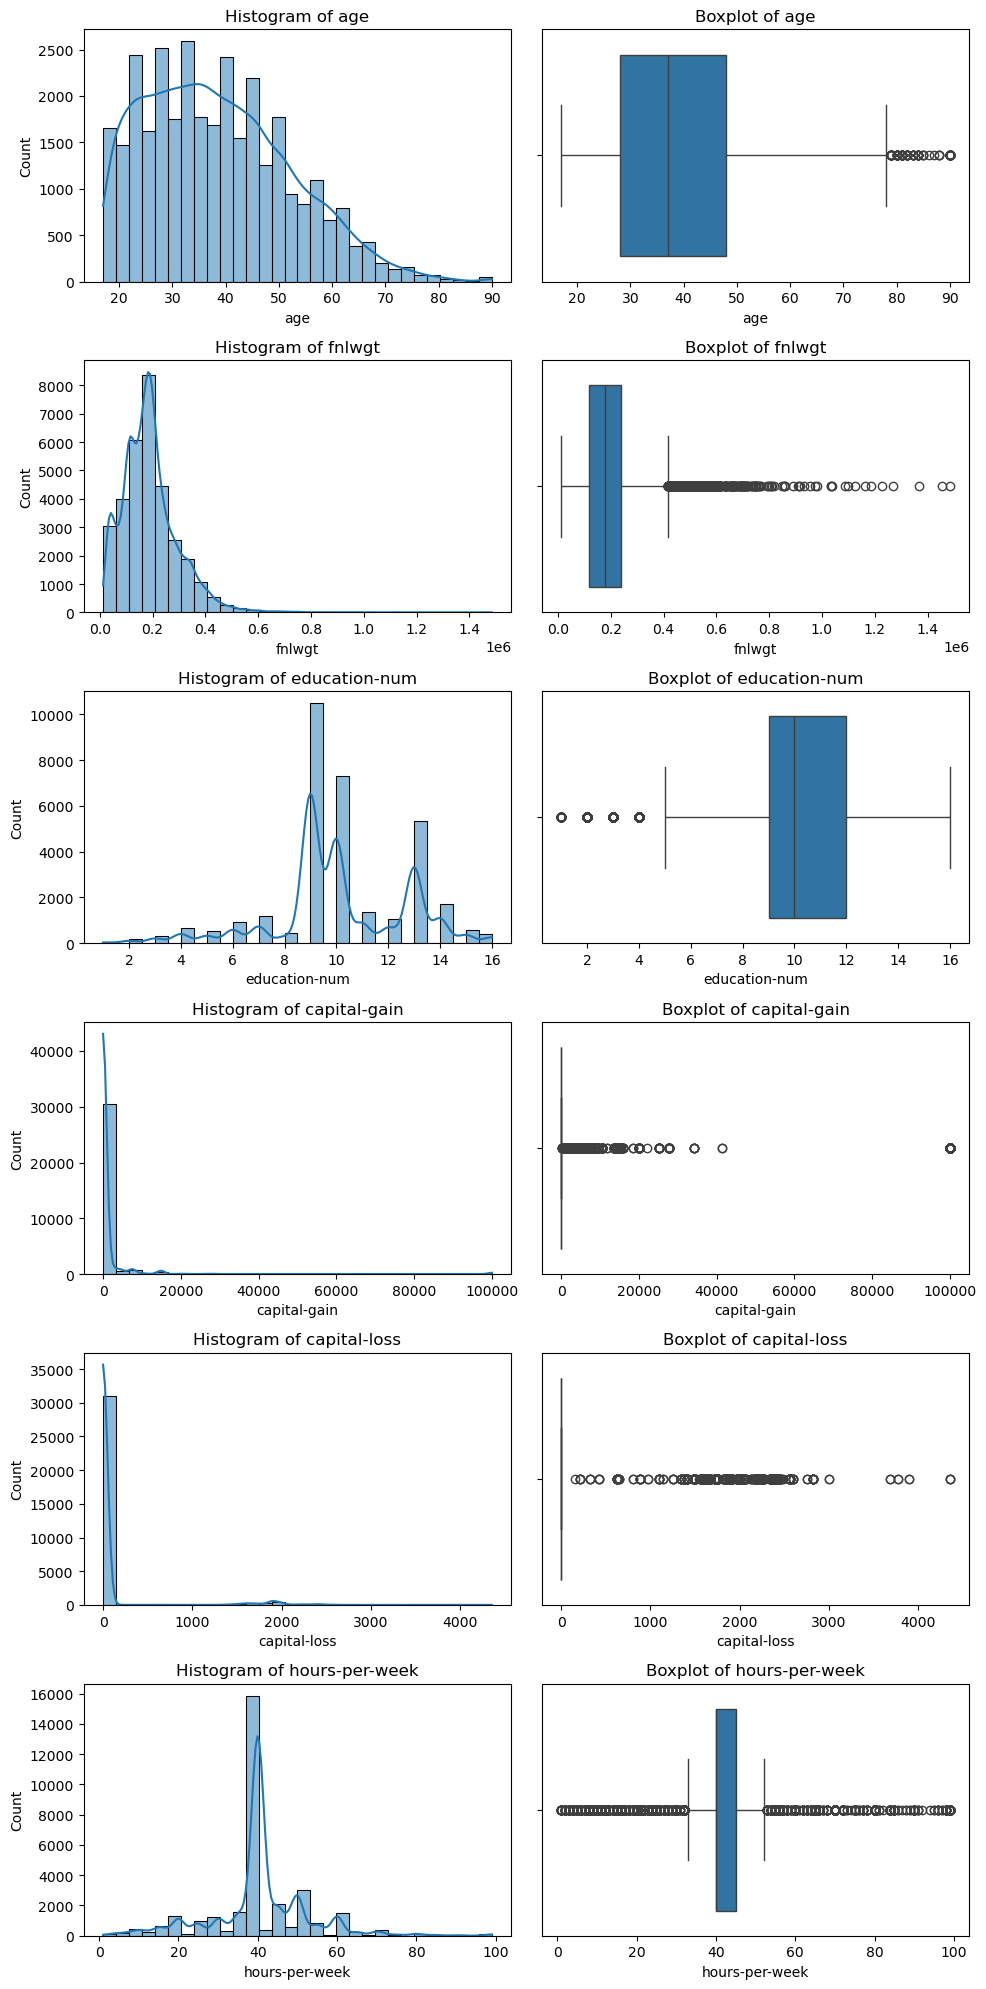

In [31]:
numeric_cols = df.select_dtypes(include='int64')
fig, axes = plt.subplots(6, 2, figsize=(10, 20))
axes = axes.flatten()
for i, col in enumerate(numeric_cols.columns):
    sns.histplot(numeric_cols[col], bins=30, kde=True, ax=axes[i*2])
    axes[i*2].set_title(f'Histogram of {col}')
    sns.boxplot(x=df[col], ax=axes[i*2+1])
    axes[i*2+1].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

##### **Noticeable Findings:**
##### - **age:** Mostly concentrated between 20-50, with a maximum of 90.
##### - **fnlwgt**: Right-skewed with a wide range and high standard deviation.
##### - **education-num**: Peaks at 9-10 years (corresponding to 'HS-grad').
##### - **capital-gain & capital-loss**: Highly right-skewed with many zeros.
##### - **hours-per-week**: Most people work around 40 hours/week, with some working up to 99.
##### - There is a significant number of outliers in total that need to be addressed.

#### 4.2 Univariate Analysis - Categorical Features

##### **Note:** I chose to use frequency tables because visualizing certain features is inconvenient.

In [36]:
string_cols = df.select_dtypes(include='string').columns
count = 0
for i in range(9):
    if count < len(string_cols):
        col = string_cols[count]
        print(f'Frequency Table for {col}:')
        absolute_freq = df[col].value_counts()
        relative_freq = df[col].value_counts(normalize=True)
        display(pd.DataFrame({'Absolute Frequency': absolute_freq, 'Relative Frequency': relative_freq}))
        print('-' * 50)
        count += 1

Frequency Table for workclass:


,Absolute Frequency,Relative Frequency
workclass,,
Private,22696,0.69703
Self-emp-not-inc,2541,0.078038
Local-gov,2093,0.064279
?,1836,0.056386
State-gov,1298,0.039864
Self-emp-inc,1116,0.034274
Federal-gov,960,0.029483
Without-pay,14,0.00043
Never-worked,7,0.000215


--------------------------------------------------
Frequency Table for education:


,Absolute Frequency,Relative Frequency
education,,
HS-grad,10501,0.322502
Some-college,7291,0.223918
Bachelors,5355,0.164461
Masters,1723,0.052916
Assoc-voc,1382,0.042443
11th,1175,0.036086
Assoc-acdm,1067,0.032769
10th,933,0.028654
7th-8th,646,0.01984


--------------------------------------------------
Frequency Table for marital-status:


,Absolute Frequency,Relative Frequency
marital-status,,
Married-civ-spouse,14976,0.459937
Never-married,10683,0.328092
Divorced,4443,0.136452
Separated,1025,0.031479
Widowed,993,0.030497
Married-spouse-absent,418,0.012837
Married-AF-spouse,23,0.000706


--------------------------------------------------
Frequency Table for occupation:


,Absolute Frequency,Relative Frequency
occupation,,
Prof-specialty,4140,0.127146
Craft-repair,4099,0.125887
Exec-managerial,4066,0.124873
Adm-clerical,3770,0.115783
Sales,3650,0.112097
Other-service,3295,0.101195
Machine-op-inspct,2002,0.061485
?,1843,0.056601
Transport-moving,1597,0.049046


--------------------------------------------------
Frequency Table for relationship:


,Absolute Frequency,Relative Frequency
relationship,,
Husband,13193,0.405178
Not-in-family,8305,0.25506
Own-child,5068,0.155646
Unmarried,3446,0.105832
Wife,1568,0.048156
Other-relative,981,0.030128


--------------------------------------------------
Frequency Table for race:


,Absolute Frequency,Relative Frequency
race,,
White,27816,0.854274
Black,3124,0.095943
Asian-Pac-Islander,1039,0.031909
Amer-Indian-Eskimo,311,0.009551
Other,271,0.008323


--------------------------------------------------
Frequency Table for sex:


,Absolute Frequency,Relative Frequency
sex,,
Male,21790,0.669205
Female,10771,0.330795


--------------------------------------------------
Frequency Table for native-country:


,Absolute Frequency,Relative Frequency
native-country,,
United-States,29170,0.895857
Mexico,643,0.019748
?,583,0.017905
Philippines,198,0.006081
Germany,137,0.004207
Canada,121,0.003716
Puerto-Rico,114,0.003501
El-Salvador,106,0.003255
India,100,0.003071


--------------------------------------------------
Frequency Table for salary:


,Absolute Frequency,Relative Frequency
salary,,
<=50K,24720,0.75919
>50K,7841,0.24081


--------------------------------------------------


##### **Noticeable Findings:**
##### - **workclass:** About 70% of the people are employed in the private sector.
##### - **marital-status:** 'Married-civ-spouse' and 'Never-married' make up about 80% of the data.
##### - **race:** Over 85% of the people are white.
##### - **sex:** There are twice as many males as females.
##### - **native-country:** About 90% of the people are from the US.
##### - **salary:** Over 75% of the people earn less than 50K.

##### The frequency tables above indicate that the dataset contains cells with '?', which likely signifies an unknown value.
##### Counting the rows that contain at least one cell with '?':

In [40]:
df.apply(lambda row: ' ?' in row.values, axis=1).sum()

2399

##### There are 2,399 rows like this, which account for only about 7.5% of the total data. As a result, they can be removed:

In [43]:
df = df[~df.apply(lambda row: ' ?' in row.values, axis=1)]
df.shape

(30162, 15)

##### The revised dataset contains 30,162 rows.

#### 4.3 Bivariate Analysis

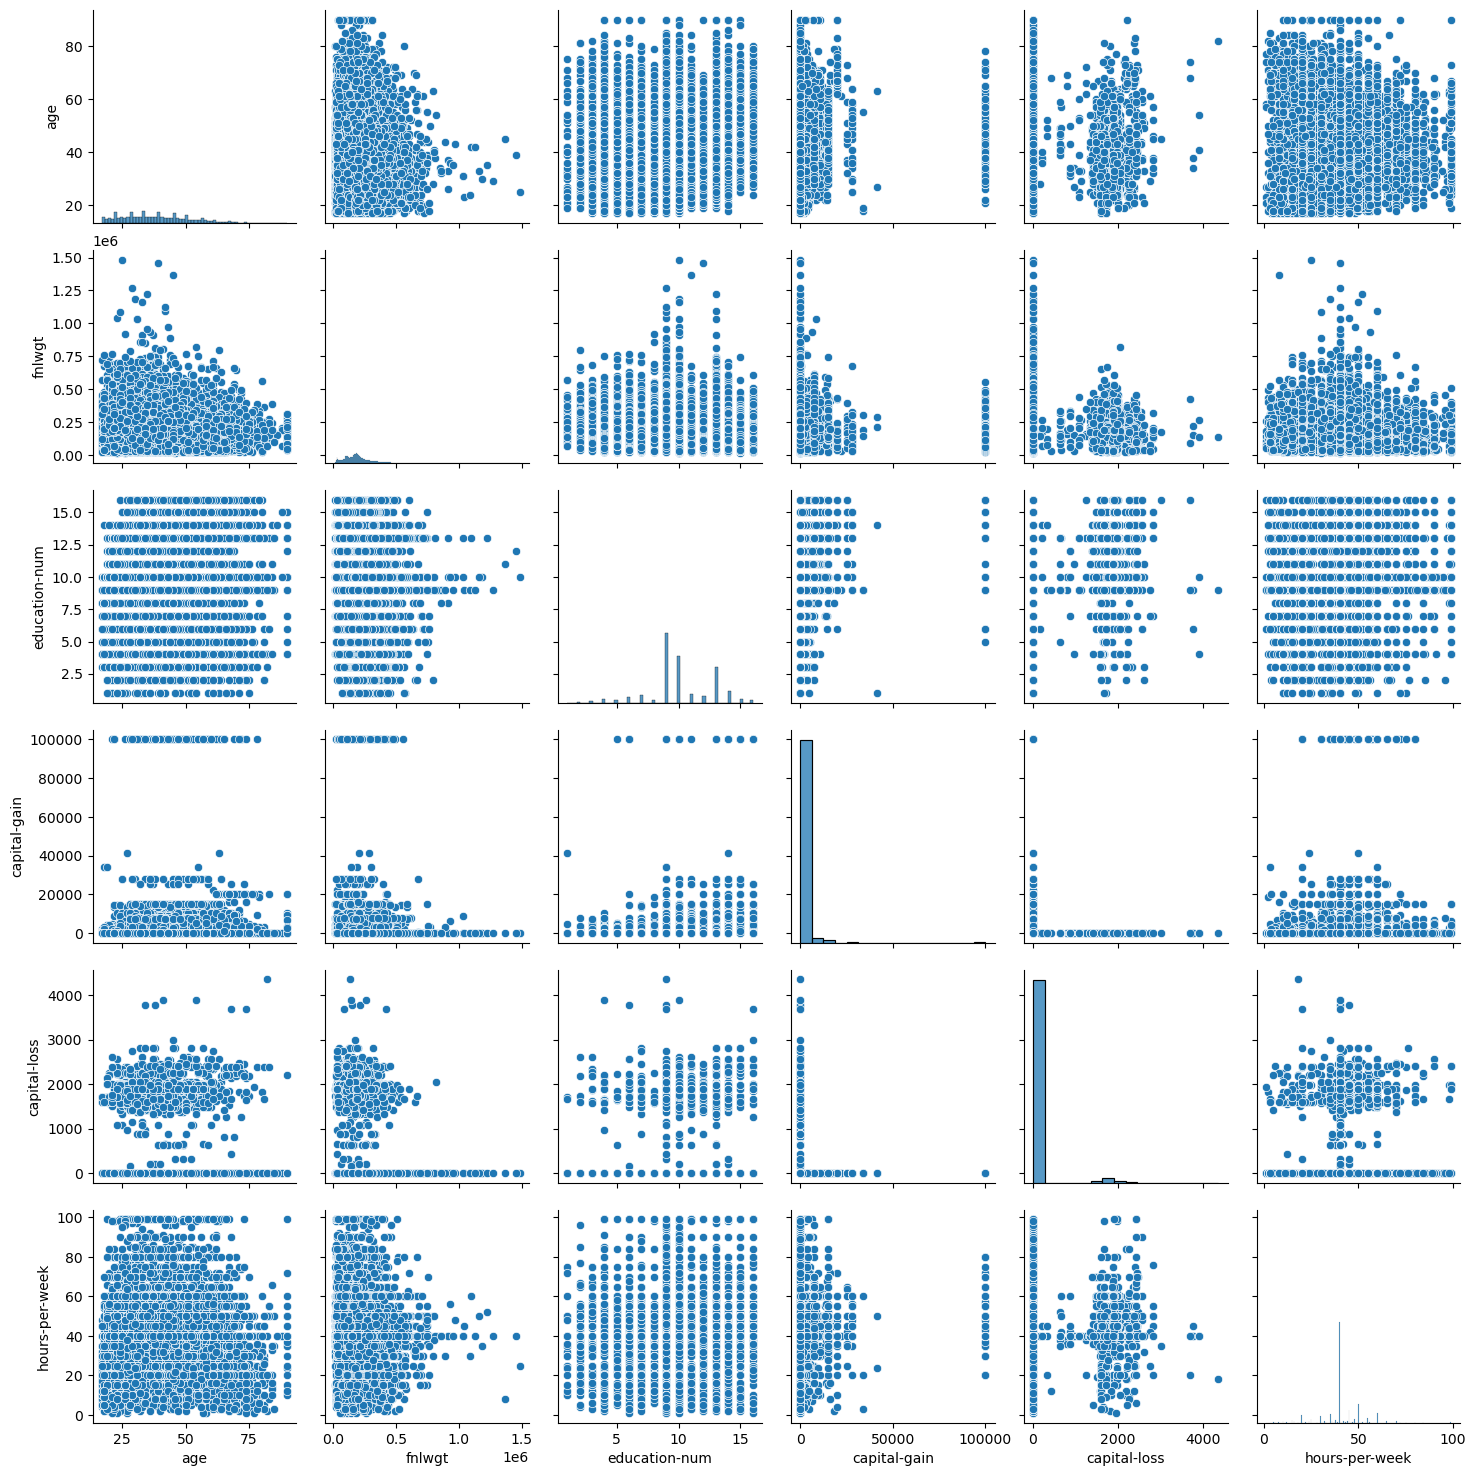

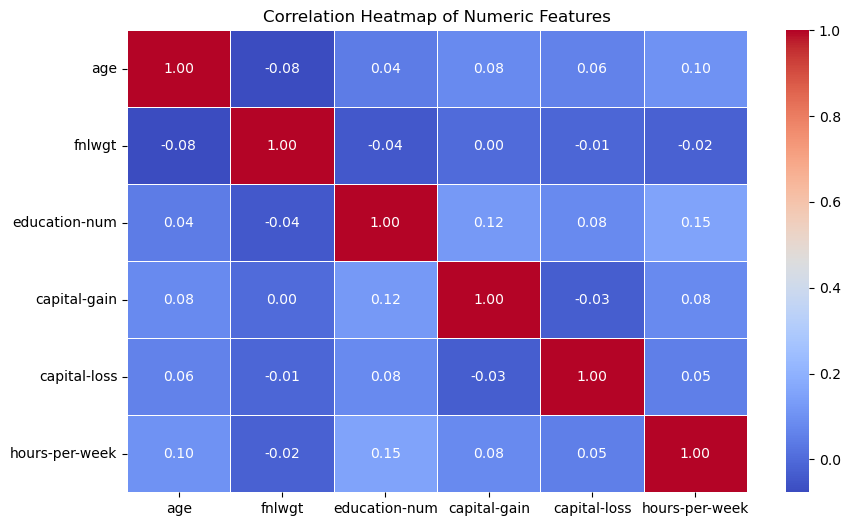

In [47]:
sns.pairplot(df)
plt.show()

corr_matrix = df.select_dtypes(include='int64').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

##### The numeric features are weakly correlated.

##### Conducting a Chi-square test of independence between the salary (target variable) and each categorical feature:

In [51]:
target = 'salary'

categorical_cols = df.select_dtypes(include='string').columns
categorical_cols = [col for col in categorical_cols if col != target]

chi2_results = []

for col in categorical_cols:
    contingency_table = pd.crosstab(df[target], df[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({
        'Feature': col,
        'Chi-square Statistic': chi2,
        'P-value': p,
        'Degrees of Freedom': dof
    })

print(pd.DataFrame(chi2_results))

          Feature  Chi-square Statistic        P-value  Degrees of Freedom
0       workclass            804.157527  1.946096e-170                   6
1       education           4070.381622   0.000000e+00                  15
2  marital-status           6061.747963   0.000000e+00                   6
3      occupation           3687.620651   0.000000e+00                  13
4    relationship           6233.840454   0.000000e+00                   5
5            race            304.241374   1.317829e-64                   4
6             sex           1415.286404  1.001553e-309                   1
7  native-country            317.736675   6.221222e-45                  40


##### The results indicate a dependence between the salary and each categorical feature.

##### Examining the distribution of numeric features within each salary group:

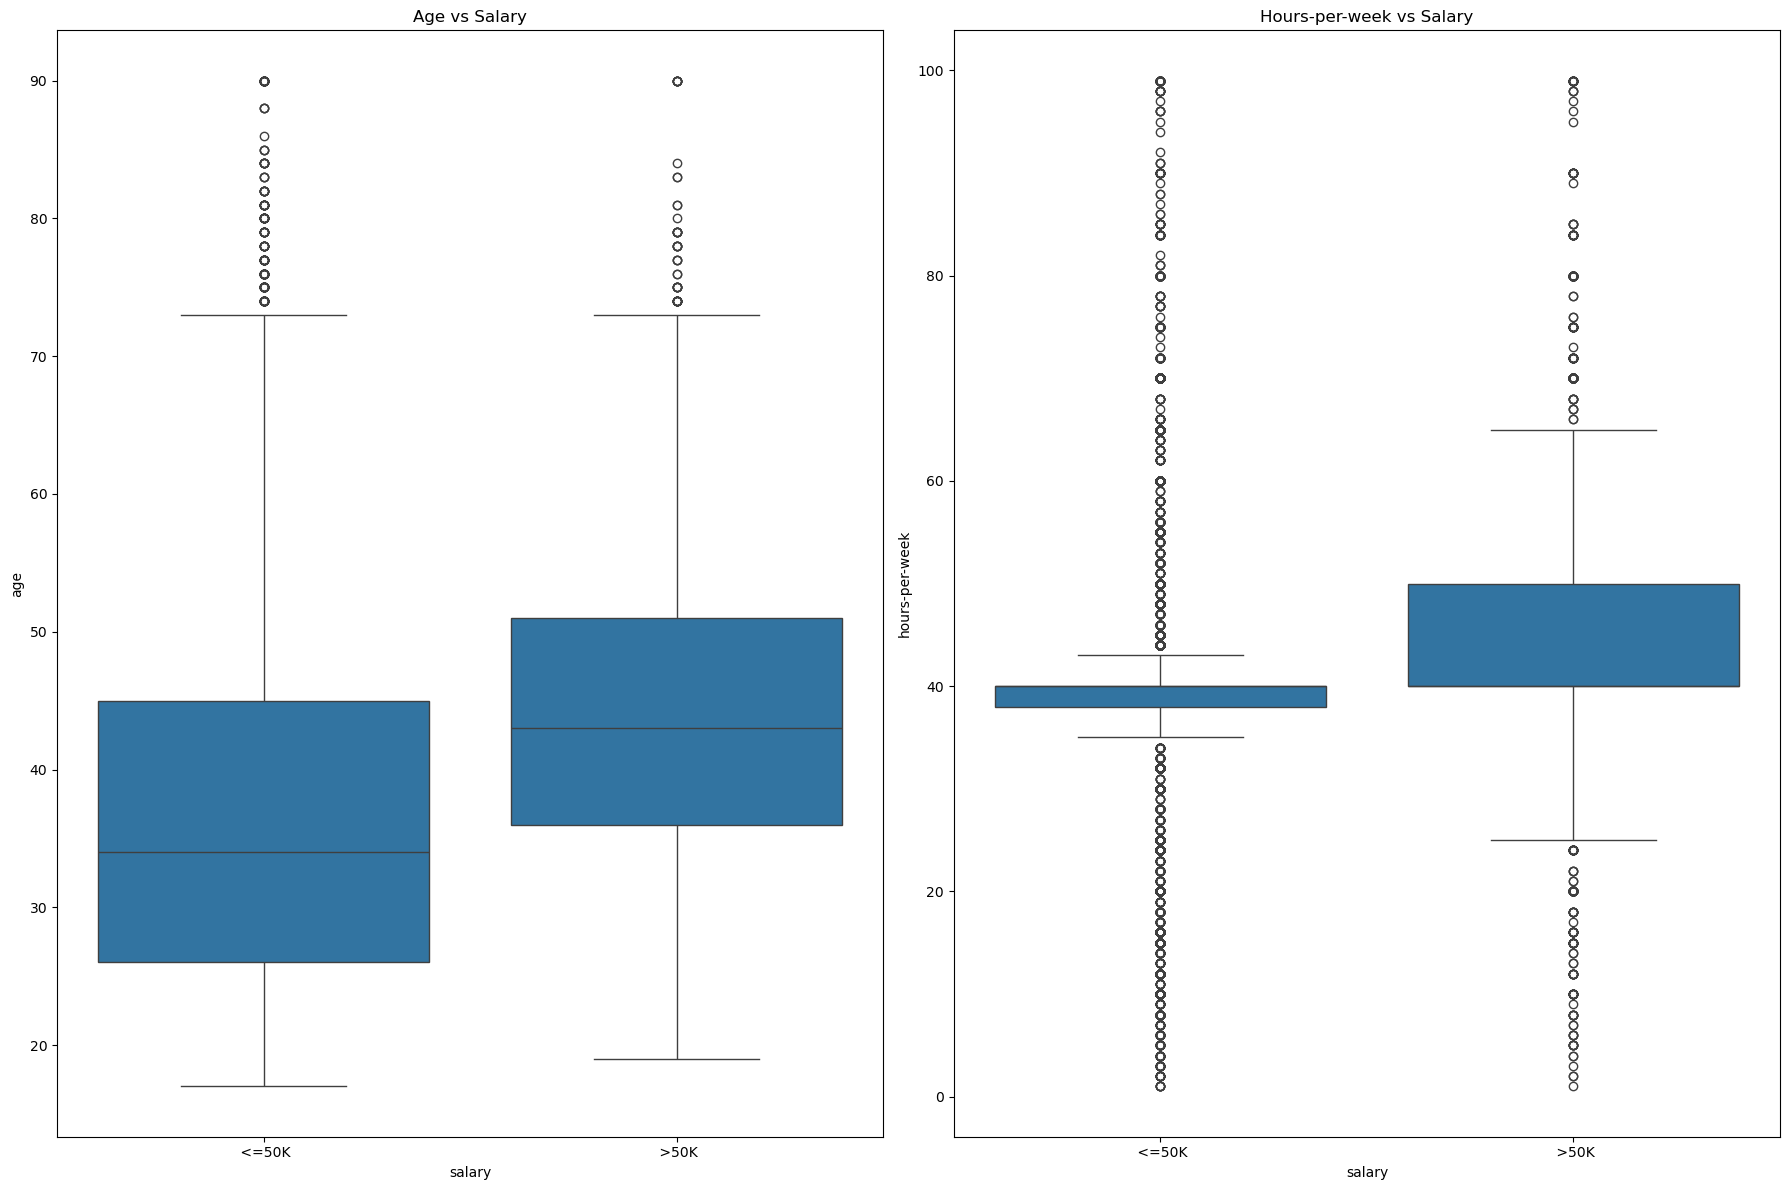

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(18, 12))

sns.boxplot(x='salary', y='age', data=df, ax=axes[0])
axes[0].set_title('Age vs Salary')

sns.boxplot(x='salary', y='hours-per-week', data=df, ax=axes[1])
axes[1].set_title('Hours-per-week vs Salary')

plt.tight_layout()
plt.show()

##### **Noticeable Findings:**
##### - The median age is greater for people earning more than 50K.
##### - The hours-per-week distribution is more spread out for people earning more than 50K, with a wider IQR.